In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin  # 对两个序列中的点进行距离匹配的函数
from sklearn.datasets import load_sample_image  # 导入图片数据所用的类
from sklearn.utils import shuffle  # 洗牌

In [2]:
# 实例化，导入颐和园的图片
china = load_sample_image("china.jpg")

In [3]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [4]:
# 查看数据类型
china.dtype

dtype('uint8')

In [5]:
china.shape
# 长度 x 宽度 x 像素 > 三个数决定的颜色

(427, 640, 3)

In [6]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [7]:
# 包含多少种不同的像素点
newimage = china.reshape((427 * 640, 3))
newimage.shape

(273280, 3)

In [8]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape

# 我们现在有9W多种颜色

(96615, 3)

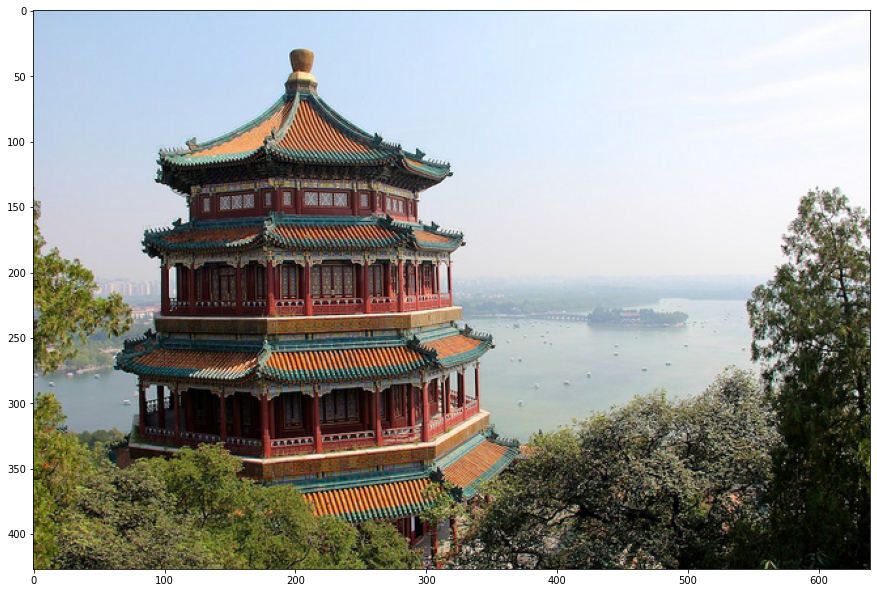

In [9]:
# 图像可视化
plt.figure(figsize=(15, 15))
plt.imshow(china)  # 导入3维数组形成的图片

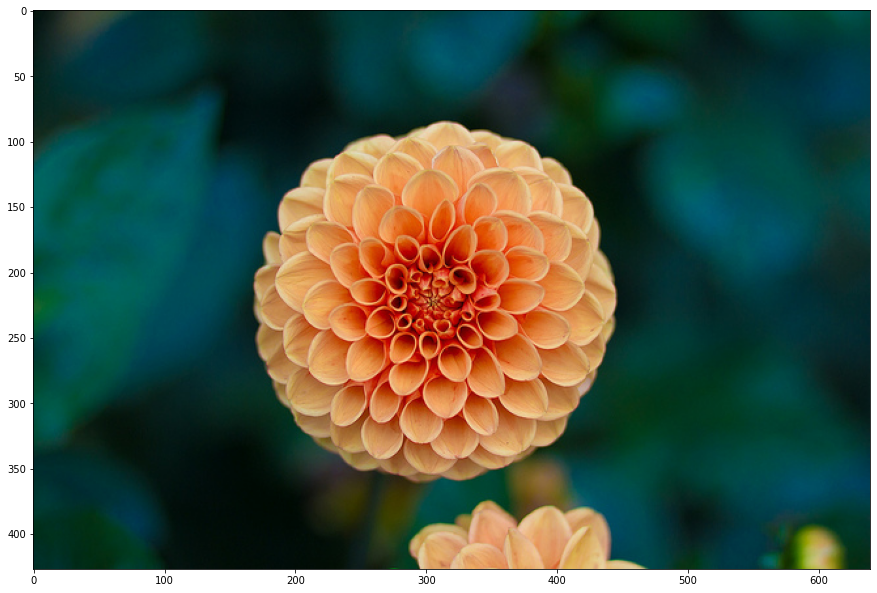

In [10]:
# 查看模块中的另一张图片
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(flower)

In [11]:
n_clusters = 64

china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [13]:
# plt.imshow在浮点数上表现非常优异，在这里我们把china中的数据，转换为浮点数，压缩到[0,1]之间
china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / china.max()

In [14]:
(china < 0).sum()

0

In [15]:
(china > 1).sum()

0

In [16]:
# 把china从图像格式，转换成矩阵格式
w, h, d = original_shape = tuple(china.shape)
w, h, d

(427, 640, 3)

In [17]:
image_array = np.reshape(china, (w * h, d))  # reshape是改变结构

In [18]:
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [19]:
image_array.shape

(273280, 3)

In [20]:
# 首先，先使用1000个数据来找出质心
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)

In [21]:
kmeans.cluster_centers_.shape

(64, 3)

In [22]:
# 找出质心之后，按照已存在的质心对所有数据进行聚类
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [31]:
set(kmeans.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [27]:
labels.shape

(273280,)

In [28]:
set(labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [29]:
# 使用质心来替换所有的样本
image_kmeans = image_array.copy()

In [32]:
labels

array([63, 63, 63, ..., 31, 35, 35], dtype=int32)

In [35]:
labels[0]

63

In [34]:
kmeans.cluster_centers_[labels[0]]

array([0.73557423, 0.8162465 , 0.91134454])

In [36]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [37]:
# 查看生成的新图片信息
image_kmeans.shape

(273280, 3)

In [38]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [39]:
# 恢复图片的结构
image_kmeans = image_kmeans.reshape(w, h, d)
image_kmeans.shape

(427, 640, 3)

In [40]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]

In [41]:
centroid_random.shape

(64, 3)

In [42]:
labels_random = pairwise_distances_argmin(centroid_random, image_array, axis=0)

# 函数pairwise_distances_argmin(x1,x2,axis) #x1和x2分别是序列
# 用来计算x2中的每个样本到x1中的每个样本点的距离，并返回和x2相同形状的，x1中对应的最近的样本点的索引

In [43]:
labels_random

array([55, 55, 55, ..., 52, 60, 60])

In [45]:
labels_random.shape

(273280,)

In [46]:
len(set(labels_random))

64

In [47]:
# 使用随机质心来替换所有样本
image_random = image_array.copy()

In [48]:
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [49]:
# 恢复图片的结构
image_random = image_random.reshape(w, h, d)
image_random.shape

(427, 640, 3)

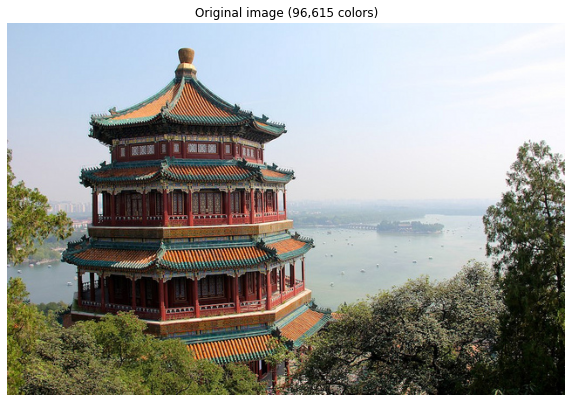

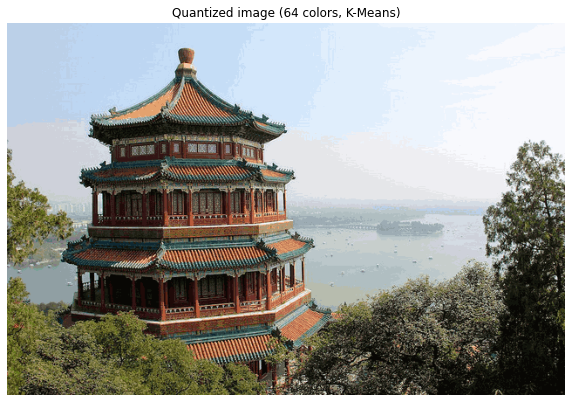

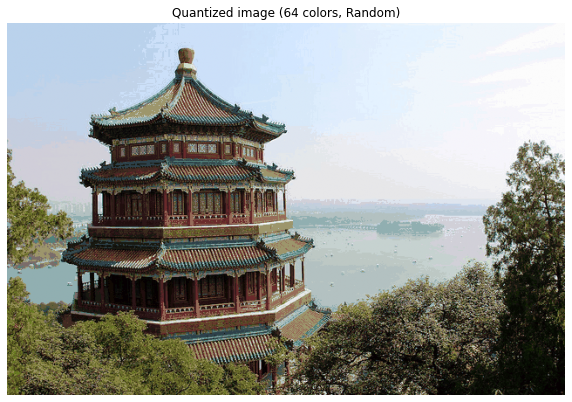

In [50]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()